### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accuracy(y_test, y_pred):
    return np.sum(y_pred == y_test) / len(y_test)

In [3]:
def decision_boundary(epoch, X, y, weights, bias):
        plt.figure()
        plt.rcParams['figure.figsize'] = [4, 3.2]
        plt.scatter(X[:, 0], X[:, 1], c = y)
        x1 = np.linspace(-0.2, 1.2, 100)
        x2 = -(weights[0] * x1 + bias) / weights[1]
        plt.plot(x1, x2, 'r')
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)
        plt.title("Interation: " + str(epoch))
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.show(block = False)
        plt.pause(0.1)
        plt.close()

### Perceptron Implementation

In [4]:
class Perceptron:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.converged = False
        self.iterations = 0

    def activation(self, z):
        return 1 if z >= 0 else 0

    def forward_prop(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
    
    def backward_prop(self, X, y, y_hat):
        self.weights += self.learning_rate * (y - y_hat) * X
        self.bias += self.learning_rate * (y - y_hat)
    
    def fit(self, X, y):
        self.n_features = X.shape[1]

        self.weights = np.zeros(self.n_features)
        self.bias = 0

        for epoch in range(1, self.epochs + 1):
            misClassified = 0
            for i in range(len(X)):
                y_hat = self.forward_prop(X[i])
                if y_hat != y[i]:
                    misClassified += 1
                    self.backward_prop(X[i], y[i], y_hat)
            if misClassified == 0:
                self.converged = True
                self.iterations = epoch - 1
                break
            print(f"Iteration: {epoch} | Weights: {self.weights} | Bias: {self.bias}")
            decision_boundary(epoch, X, y, self.weights, self.bias)
    
    def predict(self, X):
        y_hat = []
        for i in range(len(X)):
            y_hat.append(self.forward_prop(X[i]))
        return np.array(y_hat)
    
    def get_convergence(self):
        return self.converged, self.iterations
    
    def get_params(self):
        return self.weights, self.bias

### SVM Implementation

In [5]:
class SVM:
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def activation(self, z):
        return 1 if z >= 0 else 0
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for epoch in range(1, self.epochs + 1):
            for i in range(len(X)):
                if y[i] * (np.dot(self.weights, X[i]) + self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1 / epoch * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1 / epoch * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]
            print(f"Iteration: {epoch} | Weights: {self.weights} | Bias: {self.bias}")
            decision_boundary(epoch, X, y, self.weights, self.bias)
    
    def predict(self, X):
        y_hat = []
        for i in range(len(X)):
            z = np.dot(X[i], self.weights) + self.bias
            y_hat.append(self.activation(z))
        return np.array(y_hat)

### Load Data

In [6]:
# X and Y for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

### Training (Perceptron)

Iteration: 1 | Weights: [0.01 0.01] | Bias: 0.0


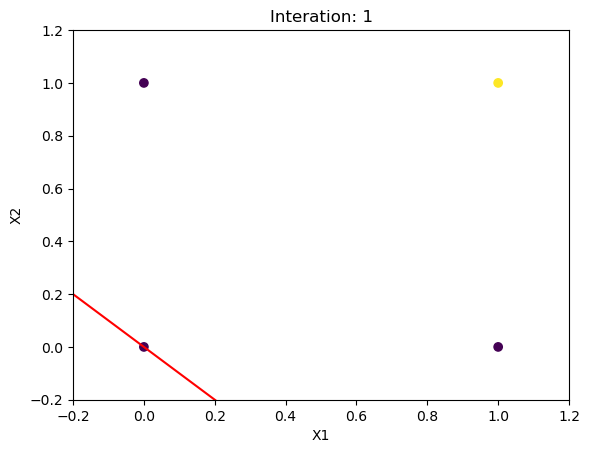

Iteration: 2 | Weights: [0.02 0.01] | Bias: -0.01


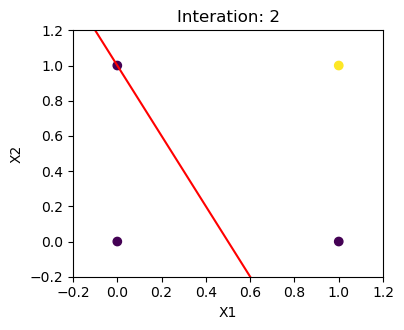

Iteration: 3 | Weights: [0.02 0.01] | Bias: -0.019999999999999997


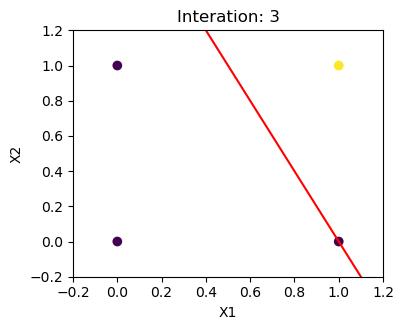

Iteration: 4 | Weights: [0.02 0.02] | Bias: -0.019999999999999997


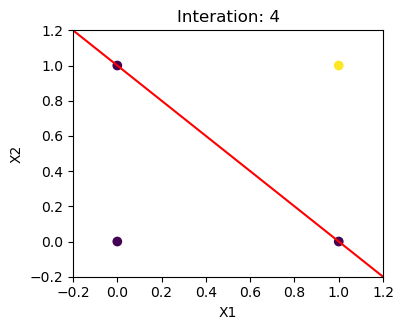

Iteration: 5 | Weights: [0.02 0.01] | Bias: -0.03


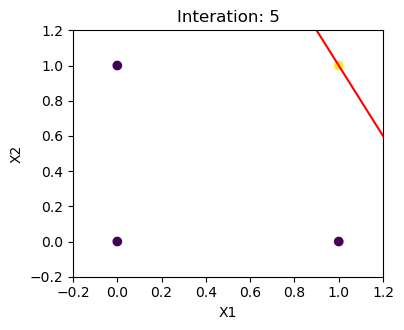

In [7]:
perceptron = Perceptron(learning_rate=0.01)
perceptron.fit(X, Y)

### Convergence (Perceptron)

In [8]:
print("Iterations required to converge the perception algorithm : ", perceptron.iterations)

Iterations required to converge the perception algorithm :  5


### Prediction (Perceptron)

In [9]:
y_pred_perceptron = perceptron.predict(X)
print("Predicted values:", y_pred_perceptron)
print("Actual values   :", Y)

Predicted values: [0 0 0 1]
Actual values   : [0 0 0 1]


### Accuracy (Perceptron)

In [10]:
acc = accuracy(Y, y_pred_perceptron)
print("Accuracy:", acc * 100, "%")

Accuracy: 100.0 %


### Training (SVM)

Iteration: 1 | Weights: [0.01 0.01] | Bias: -0.01


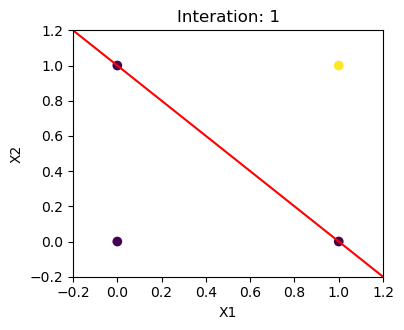

Iteration: 2 | Weights: [0.01960596 0.01960596] | Bias: -0.02


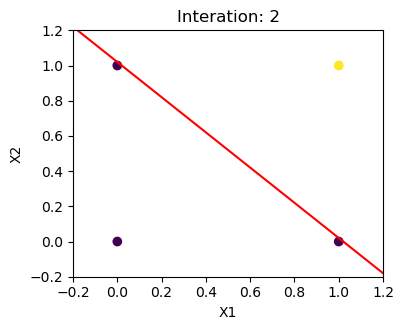

Iteration: 3 | Weights: [0.02908834 0.02908834] | Bias: -0.03


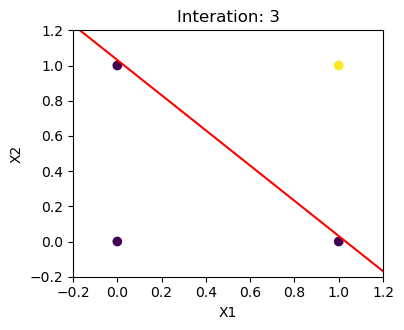

Iteration: 4 | Weights: [0.03851092 0.03851092] | Bias: -0.04


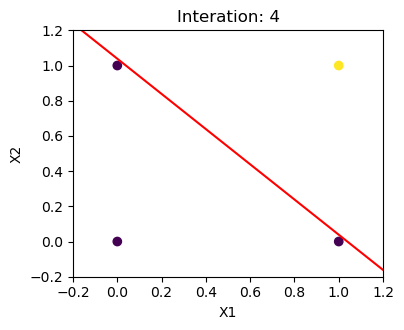

Iteration: 5 | Weights: [0.04789843 0.04789843] | Bias: -0.05


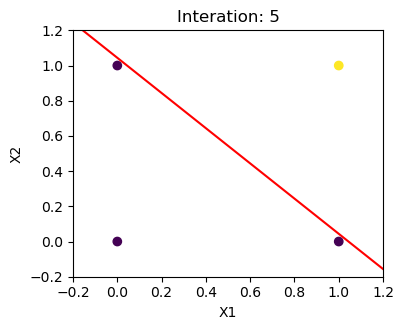

Iteration: 6 | Weights: [0.05726297 0.05726297] | Bias: -0.060000000000000005


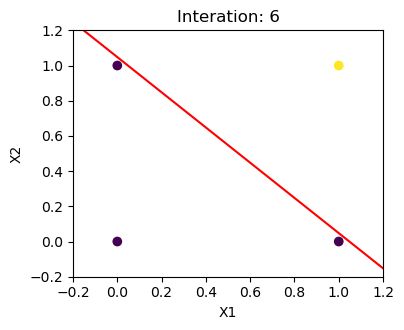

Iteration: 7 | Weights: [0.06661134 0.06661134] | Bias: -0.07


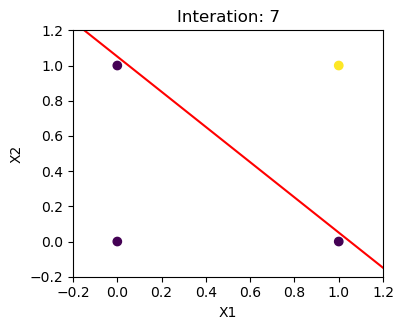

Iteration: 8 | Weights: [0.07594772 0.07594772] | Bias: -0.08


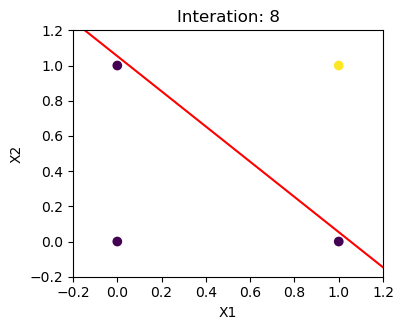

Iteration: 9 | Weights: [0.08527488 0.08527488] | Bias: -0.09


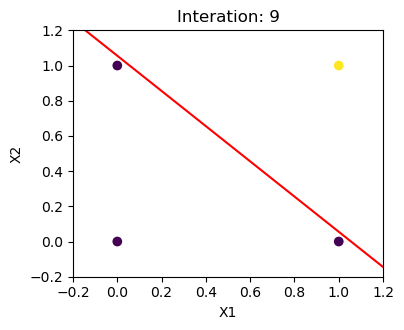

Iteration: 10 | Weights: [0.09459472 0.09459472] | Bias: -0.09999999999999999


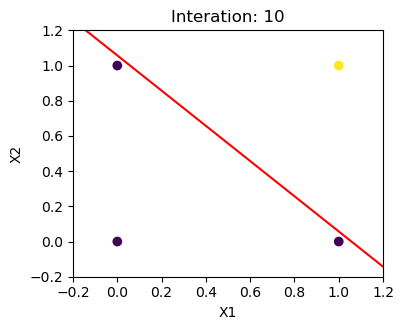

Iteration: 11 | Weights: [0.10390863 0.10390863] | Bias: -0.10999999999999999


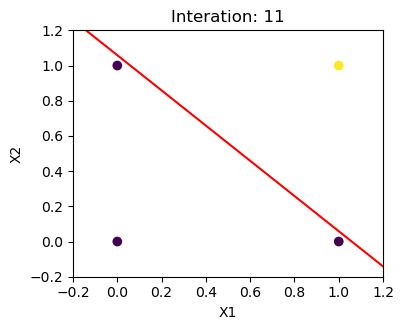

Iteration: 12 | Weights: [0.11321764 0.11321764] | Bias: -0.11999999999999998


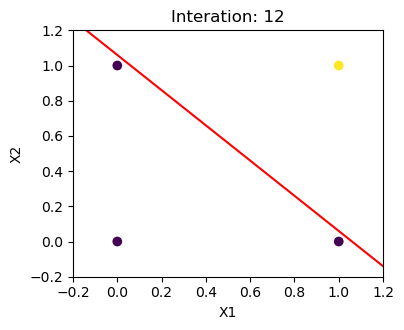

Iteration: 13 | Weights: [0.12252252 0.12252252] | Bias: -0.12999999999999998


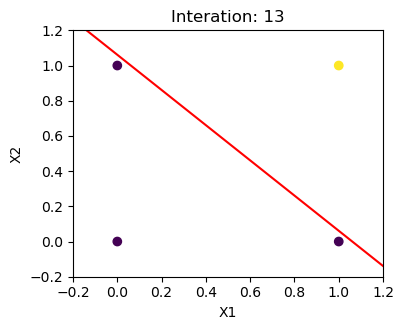

Iteration: 14 | Weights: [0.13182389 0.13182389] | Bias: -0.13999999999999999


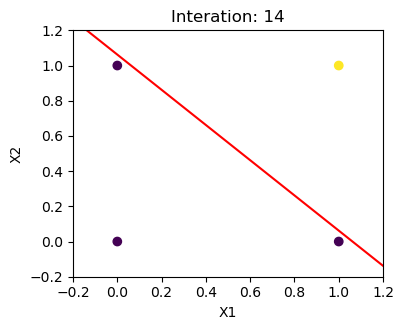

Iteration: 15 | Weights: [0.14112224 0.14112224] | Bias: -0.15


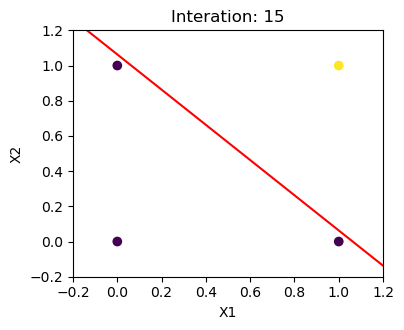

Iteration: 16 | Weights: [0.15041795 0.15041795] | Bias: -0.16


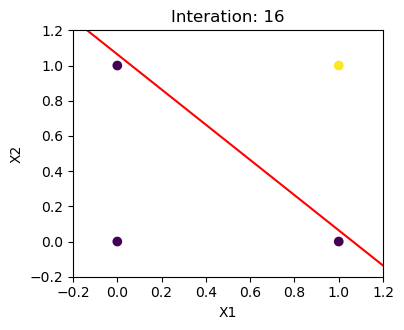

Iteration: 17 | Weights: [0.15971135 0.15971135] | Bias: -0.17


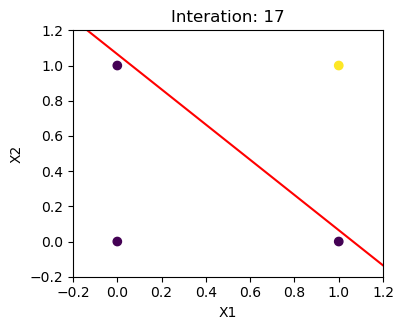

Iteration: 18 | Weights: [0.1690027 0.1690027] | Bias: -0.18000000000000002


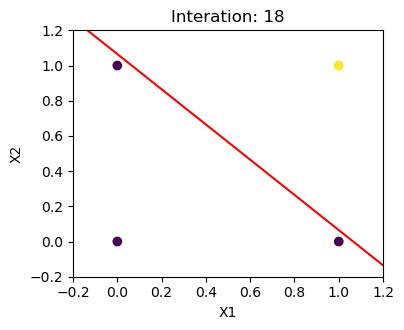

Iteration: 19 | Weights: [0.17829223 0.17829223] | Bias: -0.19000000000000003


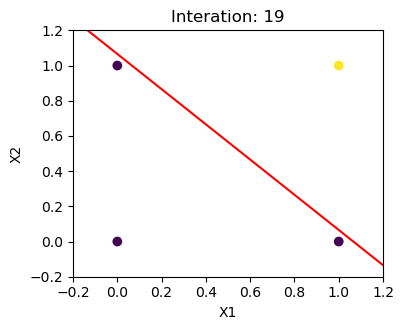

Iteration: 20 | Weights: [0.18758013 0.18758013] | Bias: -0.20000000000000004


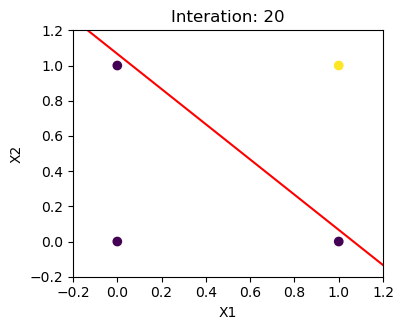

Iteration: 21 | Weights: [0.19686656 0.19686656] | Bias: -0.21000000000000005


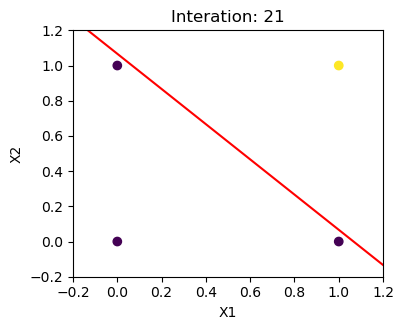

Iteration: 22 | Weights: [0.20615166 0.20615166] | Bias: -0.22000000000000006


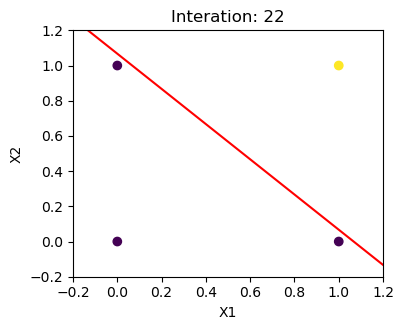

Iteration: 23 | Weights: [0.21543554 0.21543554] | Bias: -0.23000000000000007


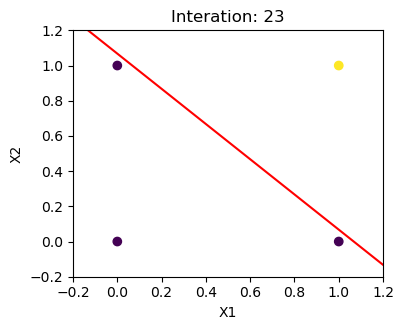

Iteration: 24 | Weights: [0.22471832 0.22471832] | Bias: -0.24000000000000007


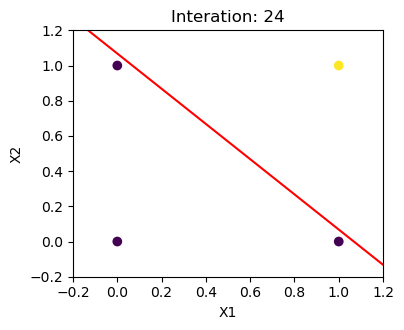

Iteration: 25 | Weights: [0.23400009 0.23400009] | Bias: -0.25000000000000006


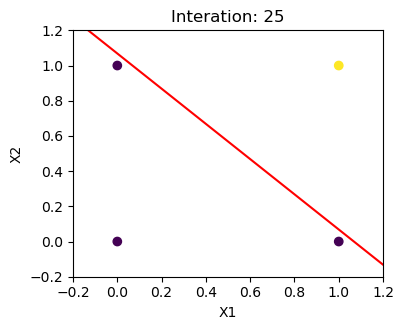

Iteration: 26 | Weights: [0.24328092 0.24328092] | Bias: -0.26000000000000006


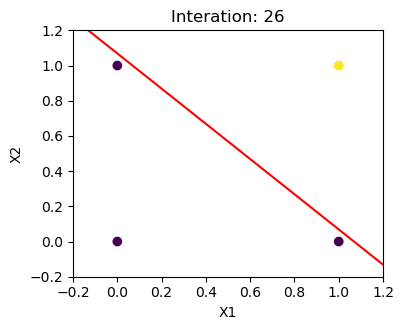

Iteration: 27 | Weights: [0.25256088 0.25256088] | Bias: -0.2700000000000001


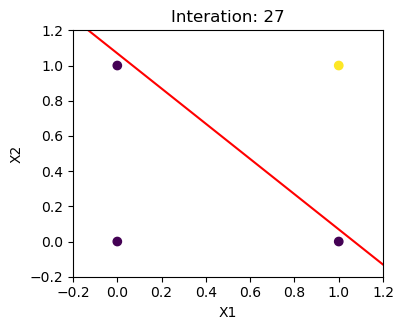

Iteration: 28 | Weights: [0.26184005 0.26184005] | Bias: -0.2800000000000001


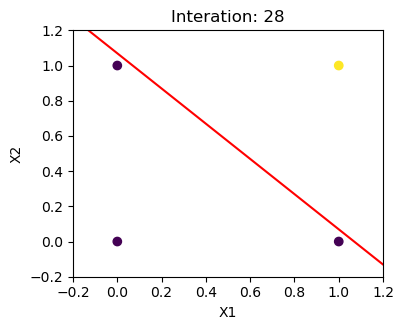

Iteration: 29 | Weights: [0.27111848 0.27111848] | Bias: -0.2900000000000001


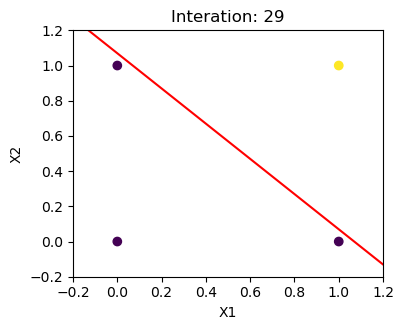

Iteration: 30 | Weights: [0.28039622 0.28039622] | Bias: -0.3000000000000001


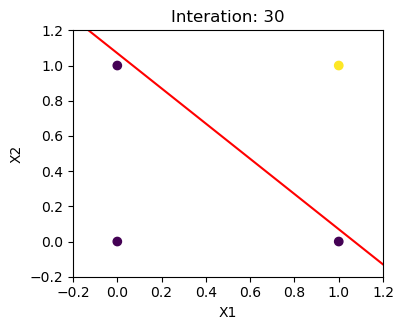

Iteration: 31 | Weights: [0.28967332 0.28967332] | Bias: -0.3100000000000001


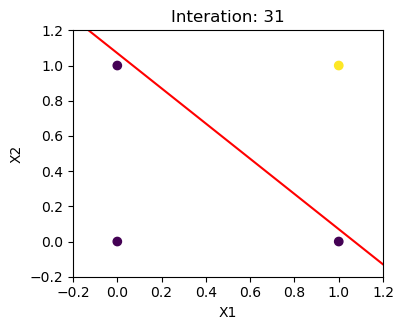

Iteration: 32 | Weights: [0.29894982 0.29894982] | Bias: -0.3200000000000001


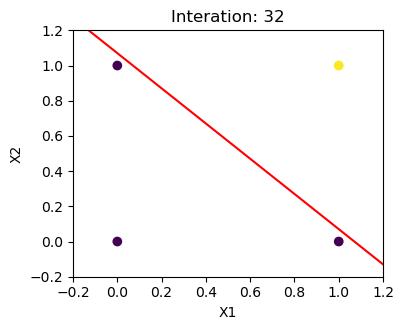

Iteration: 33 | Weights: [0.30822575 0.30822575] | Bias: -0.3300000000000001


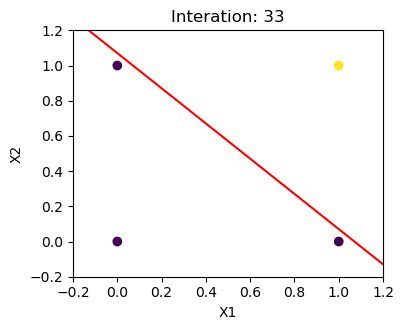

Iteration: 34 | Weights: [0.31750115 0.31750115] | Bias: -0.34000000000000014


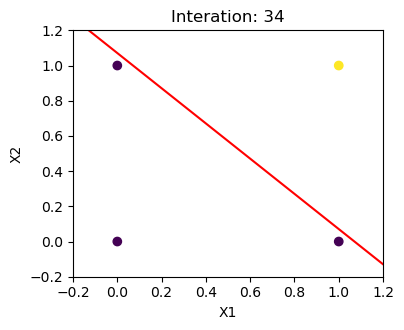

Iteration: 35 | Weights: [0.32677606 0.32677606] | Bias: -0.35000000000000014


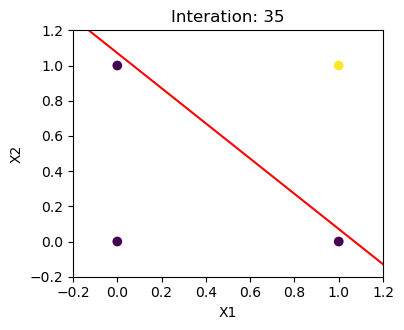

Iteration: 36 | Weights: [0.33605049 0.33605049] | Bias: -0.36000000000000015


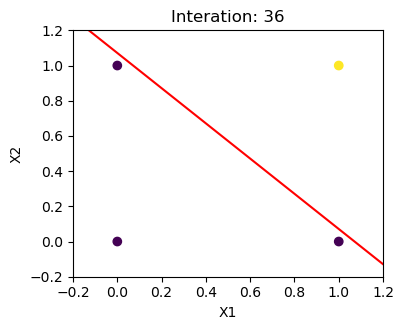

Iteration: 37 | Weights: [0.34532448 0.34532448] | Bias: -0.37000000000000016


KeyboardInterrupt: 

In [11]:
svm = SVM(learning_rate=0.01, epochs=100)
svm.fit(X, Y)

### Prediction (SVM)

In [ ]:
y_pred_svm = svm.predict(X)
print("Predicted values:", y_pred_svm)
print("Actual values   :", Y)

Predicted values: [0 0 0 1]
Actual values   : [0 0 0 1]


### Accuracy (SVM)

In [ ]:
acc = accuracy(Y, y_pred_svm)
print("Accuracy:", acc * 100, "%")

Accuracy: 100.0 %
